# SVD


In [28]:
import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib.image import imread

#import scipy as sp

In [126]:
X1 = np.random.rand(300,200) # nxm matrix

The SVD is a unique matrix decomposition that exists for every complex-valued matrix X:
#### X = U $\Sigma$ V<sup>*</sup>

Where <sup>*</sup> denotes the conjugate transpose of a matrix.

In [121]:
U, S, V = np.linalg.svd(X1) # full_matrices=True by default

- U is nxn square, unitary matrix.
- S is an nxm diagonal matrix.
- V is an mxm square, unitary matrix.

A square matrix U is unitary if U<sup>*</sup>U = UU<sup>*</sup> = I. For real-valued matrixes, this is the same as the regular transpose.

In [122]:
(np.rint(U.conj().T @ U) == np.eye(U.shape[0])).all()

True

In [123]:
(np.rint(V.conj().T @ V) == np.eye(V.shape[0])).all()

True

This means it's way easier to get inverse matrix of unitary matrixes, as we just have to transpose them: N(O<sup>2</sup>) vs N(O<sup>3</sup>) of the inverse.

Moreover unitary matrixes have more useful properties:

- If we take 2 vectors and map them through U or V, their lenghts and angles between them are preserved.

In [128]:
S.shape

(200,)

As S ( $\Sigma$ ) is a diagonal matrix, Numpy just returns this diagonal vector, which contains the singular values ordered from largest to smallest. 

In [32]:
U_hat, S_hat, V_hat = np.linalg.svd(X1, full_matrices=False) #Economy SVD. 

In [54]:
path = os.path.dirname(os.path.abspath('SVD'))
A = imread(os.path.join(path,'Data','party.jpg')) #Illustration by @lewyjones
X = np.mean(A, -1) # Convert RGB to grayscale

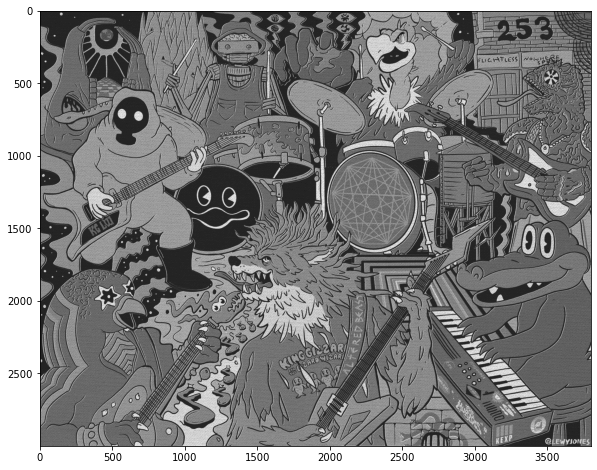

<Figure size 720x720 with 0 Axes>

In [56]:
img = plt.imshow(X)
plt.figure(figsize=(10,10))
img.set_cmap('gray')
#plt.axis('off')
plt.show()

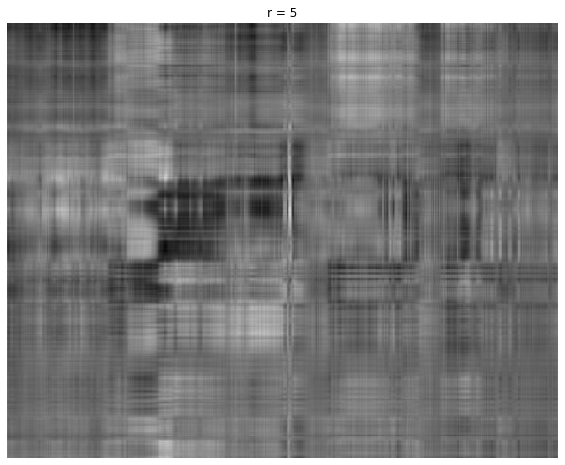

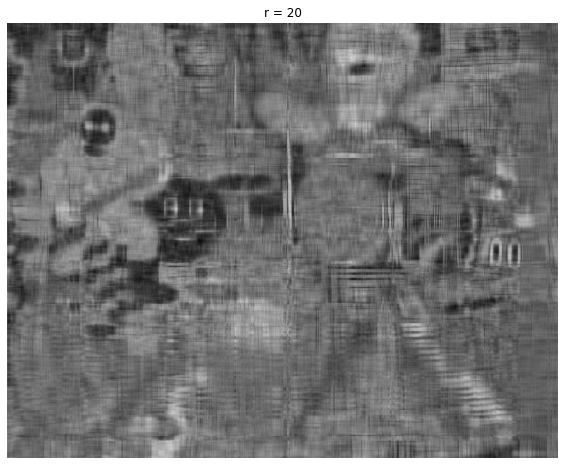

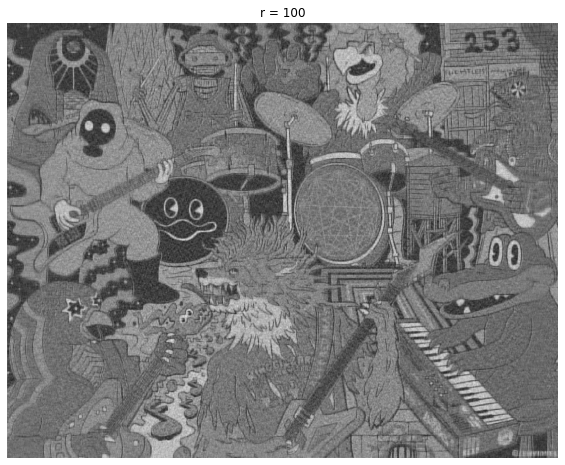

In [57]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

j = 0
for r in (5, 20, 100):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

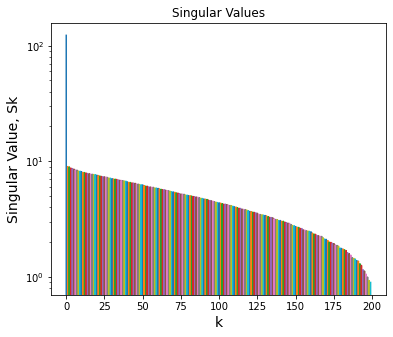

<Figure size 1152x576 with 0 Axes>

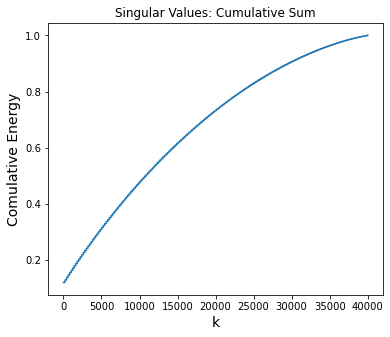

In [134]:
plt.figure(figsize=(6,5))

plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')

#plt.scatter([5, 20, 100],np.diag(S),color='firebrick',label='r')

plt.xlabel('k',size=14)
plt.ylabel('Singular Value, Sk',size=14)
plt.legend
plt.show()


plt.figure(2)
plt.figure(figsize=(6,5))

plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')

plt.xlabel('k',size=14)
plt.ylabel('Comulative Energy',size=14)

plt.show()